Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None

First Few Rows of Data:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896      

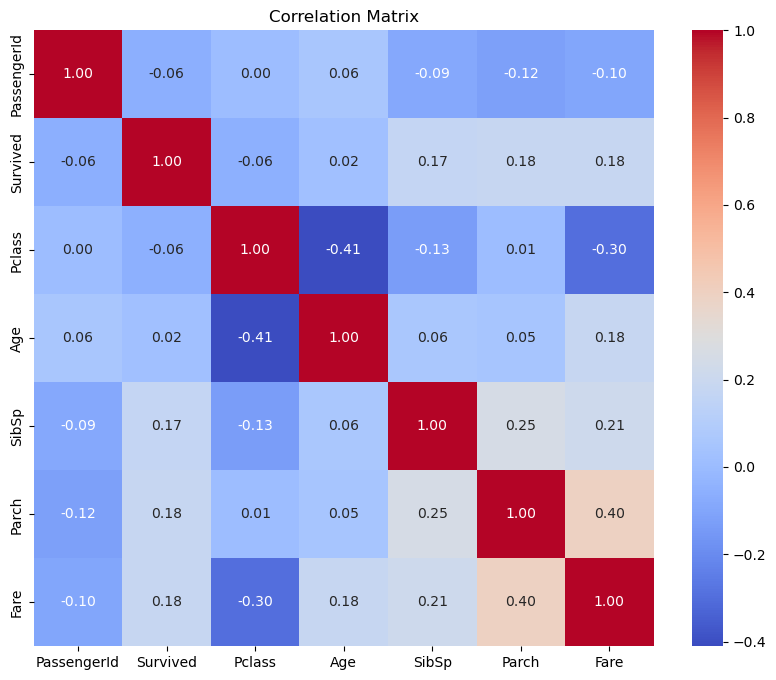

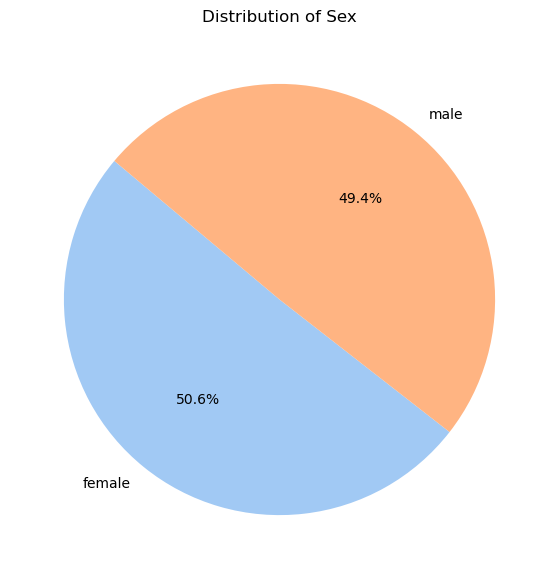

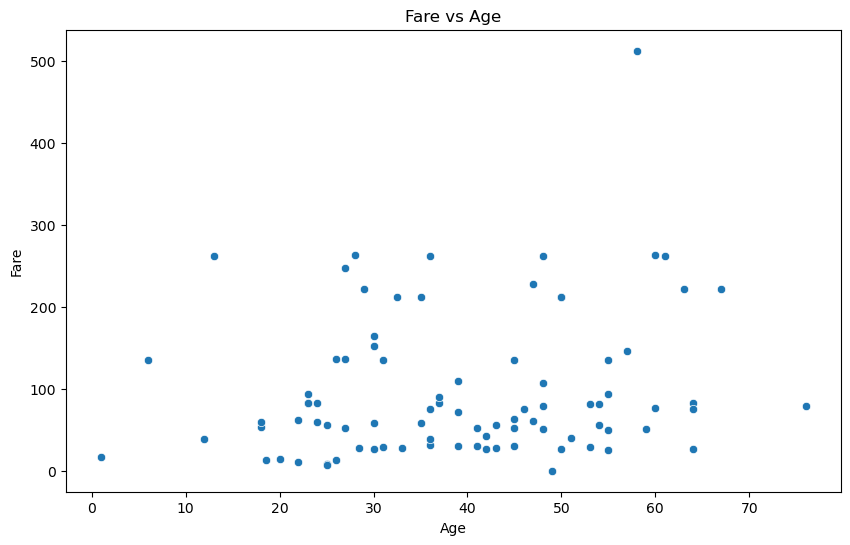

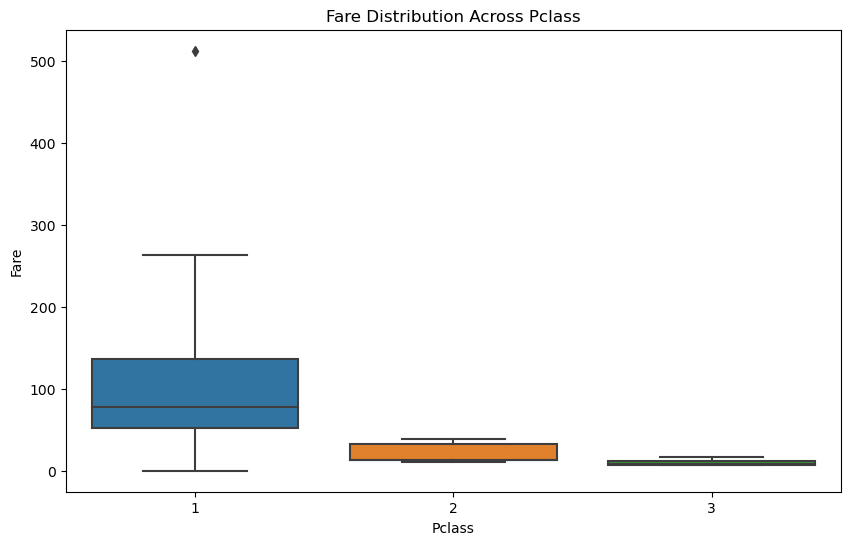

C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

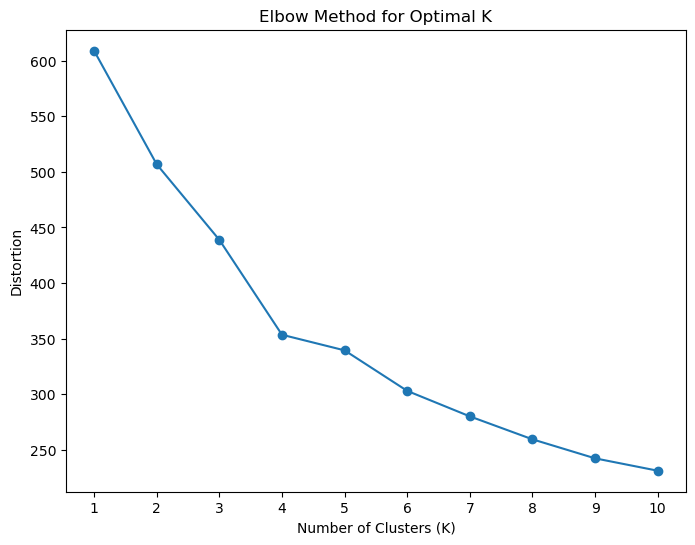

C:\Users\sharu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


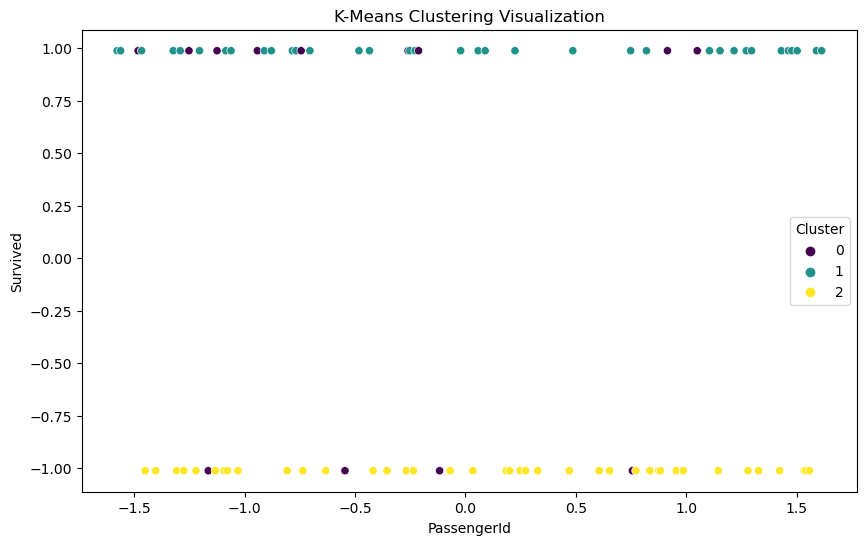

Mean Squared Error for Fare prediction: 7121.29


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('tested.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display the first few rows of data
print("\nFirst Few Rows of Data:")
print(df.head())

# Data Cleaning: Drop rows with missing values
df.dropna(inplace=True)

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Correlation Matrix: Selecting numeric columns and visualizing their correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 1. Pie Chart: Distribution of a categorical column (e.g., "Sex")
def create_pie_plot(data, column_name):
    value_counts = data[column_name].value_counts()
    plt.figure(figsize=(7, 7))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Example: Pie chart for 'Sex' column
create_pie_plot(df, 'Sex')

# 2. Scatter Plot: Relationship between two numeric columns (e.g., 'Age' and 'Fare')
def create_scatter_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_column, y=y_column)
    plt.title(f'{y_column} vs {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example: Scatter plot for 'Age' vs 'Fare'
create_scatter_plot(df, 'Age', 'Fare')

# 3. Box Plot: Distribution of a numeric column (e.g., 'Fare') across a categorical column (e.g., 'Pclass')
def create_box_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_column, y=y_column)
    plt.title(f'{y_column} Distribution Across {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Example: Box plot for 'Pclass' vs 'Fare'
create_box_plot(df, 'Pclass', 'Fare')

# 4. Elbow Method for K-Means clustering to find the optimal number of clusters
def plot_elbow_method(data, feature_columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[feature_columns])

    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, distortions, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.xticks(K)
    plt.show()

plot_elbow_method(df, numeric_columns)

# 5. K-Means Clustering: Perform K-Means clustering and visualize the clusters
def perform_kmeans(data, feature_columns, n_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[feature_columns])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Visualizing the clustering (using the first two features for simplicity)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title('K-Means Clustering Visualization')
    plt.xlabel(feature_columns[0])
    plt.ylabel(feature_columns[1])
    plt.show()

perform_kmeans(df, numeric_columns, n_clusters=3)

# 6. Linear Regression: Predicting a numeric column (e.g., 'Fare') based on other columns (e.g., 'Age' and 'SibSp')
def perform_linear_regression(data, x_columns, y_column):
    X = data[x_columns]
    y = data[y_column]

    model = LinearRegression()
    model.fit(X, y)

    # Predictions and evaluation
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    print(f"Mean Squared Error for {y_column} prediction: {mse:.2f}")

    # Plotting the regression line (if applicable)
    if len(x_columns) == 1:  # Only plot if there's one feature
        plt.figure(figsize=(10, 6))
        plt.scatter(X[x_columns[0]], y, color='blue', label='Actual Data')
        plt.plot(X[x_columns[0]], predictions, color='red', label='Regression Line')
        plt.title(f"Linear Regression: {y_column} vs {x_columns[0]}")
        plt.xlabel(x_columns[0])
        plt.ylabel(y_column)
        plt.legend()
        plt.show()

perform_linear_regression(df, ['Age', 'SibSp'], 'Fare')  # Replace with relevant columns in your dataset

# Optionally, save the cleaned and processed data
df.to_csv("cleaned_tested_data.csv", index=False)


In [3]:
#Descriptive Statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cluster
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,1102.712644,0.505747,1.137931,39.247126,0.597701,0.482759,98.109198,1.298851
std,126.751901,0.502865,0.435954,15.218730,0.637214,0.860801,88.177319,0.717148
min,904.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,986.000000,0.000000,1.000000,27.000000,0.000000,0.000000,35.339600,1.000000
50%,1094.000000,1.000000,1.000000,39.000000,1.000000,0.000000,71.283300,1.000000
75%,1216.000000,1.000000,1.000000,50.000000,1.000000,1.000000,135.066650,2.000000
max,1306.000000,1.000000,3.000000,76.000000,3.000000,4.000000,512.329200,2.000000


In [4]:
# Compute the correlation matrix
numeric_cols = df.select_dtypes(include='number') 
correlation_matrix = numeric_cols.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.058260  0.004934  0.055488 -0.087828 -0.122551   
Survived       -0.058260  1.000000 -0.056699  0.022983  0.170596  0.181554   
Pclass          0.004934 -0.056699  1.000000 -0.410924 -0.132790  0.006411   
Age             0.055488  0.022983 -0.410924  1.000000  0.062530  0.051144   
SibSp          -0.087828  0.170596 -0.132790  0.062530  1.000000  0.252194   
Parch          -0.122551  0.181554  0.006411  0.051144  0.252194  1.000000   
Fare           -0.097346  0.179047 -0.298186  0.180567  0.213014  0.395685   
Cluster         0.140644 -0.714173 -0.021802  0.143909 -0.319090 -0.650818   

                 Fare   Cluster  
PassengerId -0.097346  0.140644  
Survived     0.179047 -0.714173  
Pclass      -0.298186 -0.021802  
Age          0.180567  0.143909  
SibSp        0.213014 -0.319090  
Parch        0.395685 -0.650818  
Fare         1.000000 -0.428706  
Clus